# Which Classifier Should I Choose? 

This is one of the most import questions to ask when approaching a machine learning problem. I find it easier to just test them all at once. Here's 10 of your favorite Scikit-Learn algorithms applied to the leaf data. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import StratifiedShuffleSplit

train = pd.read_csv(r"C:\Users\Electonics\OneDrive\Desktop\mphil_research\margin\train.csv")
test = pd.read_csv(r"C:\Users\Electonics\OneDrive\Desktop\mphil_research\margin\test.csv")

In [2]:
train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


## Data Preparation


In [3]:
# Swiss army knife function to organize the data

def encode(train, test):
    le = LabelEncoder().fit(train.species) 
    labels = le.transform(train.species)           # encode species strings
    classes = list(le.classes_)                    # save column names for submission
    test_ids = test.id                             # save test ids for submission
    
    #train = train.drop(['species', 'id'], axis=1)
    train = train.iloc[:,2:66]
    #test = test.drop(['id'], axis=1)
    test = test.iloc[:,1:65]
    
    return train, labels, test, test_ids, classes

train, labels, test, test_ids, classes = encode(train, test)
train.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.025391,0.003906,0.013672,0.015625,0.013672,0.003906,0.005859,0.003906,0.019531,0.001953
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.029297,0.009766,0.017578,0.007812,0.013672,0.019531,0.000000,0.000000,0.003906,0.000000
2,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,...,0.105470,0.000000,0.015625,0.015625,0.019531,0.001953,0.000000,0.005859,0.011719,0.007812
3,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,...,0.037109,0.017578,0.003906,0.000000,0.001953,0.003906,0.003906,0.000000,0.003906,0.005859
4,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,...,0.003906,0.017578,0.015625,0.001953,0.041016,0.005859,0.000000,0.000000,0.017578,0.000000


In [4]:
test.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64
0,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,0.023438,...,0.007812,0.000000,0.009766,0.003906,0.054688,0.000000,0.000000,0.000000,0.052734,0.000000
1,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,0.023438,...,0.005859,0.000000,0.021484,0.015625,0.048828,0.000000,0.000000,0.007812,0.029297,0.013672
2,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,0.005859,...,0.017578,0.001953,0.000000,0.005859,0.001953,0.039062,0.003906,0.029297,0.000000,0.011719
3,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,0.001953,...,0.025391,0.007812,0.005859,0.000000,0.011719,0.023438,0.003906,0.044922,0.007812,0.031250
4,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,0.000000,...,0.007812,0.027344,0.013672,0.001953,0.015625,0.015625,0.000000,0.000000,0.000000,0.000000


## Stratified Train/Test Split

Stratification is necessary for this dataset because there is a relatively large number of classes (100 classes for 990 samples). This will ensure we have all classes represented in both the train and test indices. 

In [5]:
sss = StratifiedShuffleSplit(labels, 10, test_size=0.2, random_state=23)

for train_index, test_index in sss:
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Sklearn Classifier Showdown

Simply looping through 10 out-of-the box classifiers and printing the results. Obviously, these will perform much better after tuning their hyperparameters, but this gives you a decent ballpark idea. 

In [6]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    LinearDiscriminantAnalysis(),
    NuSVC(probability=True),
    SVC(kernel="rbf", C=0.025, probability=True),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    #RandomForestClassifier(),
    #AdaBoostClassifier(),
    # QuadraticDiscriminantAnalysis()
]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)


LinearDiscriminantAnalysis
****Results****
Accuracy: 80.8081%
Log Loss: 2.3247700050933875
NuSVC
****Results****
Accuracy: 81.8182%
Log Loss: 2.3665670231940523
SVC
****Results****
Accuracy: 74.2424%
Log Loss: 4.696175380289836
KNeighborsClassifier
****Results****
Accuracy: 72.7273%
Log Loss: 4.500611388330644
DecisionTreeClassifier
****Results****
Accuracy: 45.9596%
Log Loss: 18.664894314421527
GradientBoostingClassifier
****Results****
Accuracy: 44.4444%
Log Loss: 4.699451635613247
GaussianNB
****Results****
Accuracy: 69.6970%
Log Loss: 9.28390973243011


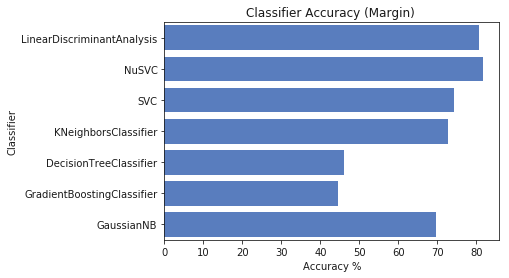

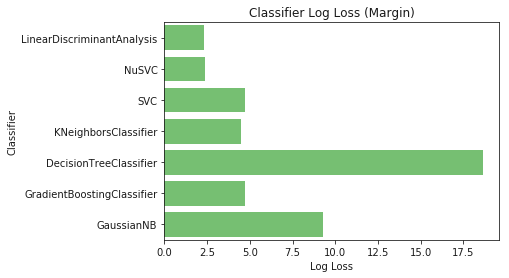

In [7]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy (Margin) ')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss (Margin)')
plt.show()

**##Random search for optimal hyperparameters of the SVM classifier**

In [8]:
import scipy
from sklearn.grid_search import RandomizedSearchCV
clf = SVC(probability=True, random_state=1)
param_grid = {'C': scipy.stats.expon(scale=100), 'gamma': scipy.stats.expon(scale=.1),
  'kernel': ['rbf'], 'class_weight':['balanced', None]}
rand_search = RandomizedSearchCV(clf, param_distributions = param_grid, n_iter = 20) 
rand_search.fit(X_train,y_train) 
rand_search.best_params_

{'C': 23.77904424771812,
 'class_weight': 'balanced',
 'gamma': 0.02495601418737045,
 'kernel': 'rbf'}

In [9]:
predr = rand_search.predict(X_test)
print("Accuracy: {:.4%}".format(accuracy_score(y_test,predr)))

Accuracy: 81.3131%


Hyperparameter tuning gives us an accuracy boost of over 1%!!!

## Submission

After choosing your favorite classifier, format the output for a leaderboard submission. 

In [10]:
# Predict Test Set
favorite_clf = SVC(C=13.450385695977566, class_weight='balanced', gamma=0.0043155380191205834,
 kernel='rbf',probability = True, random_state=1)
favorite_clf.fit(X_train, y_train)
test_predictions = favorite_clf.predict_proba(test)

# Format DataFrame
submission = pd.DataFrame(test_predictions, columns=classes)
submission.insert(0, 'id', test_ids)
submission.reset_index()

# Export Submission
#submission.to_csv('submission.csv', index = False)
submission.head()

,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,0.007337,0.004614,0.010526,0.038741,0.002140,0.004764,0.007226,0.006305,0.004768,...,0.002903,0.006135,0.010725,0.017396,0.007703,0.010373,0.004548,0.012884,0.009249,0.007168
1,7,0.007306,0.004638,0.010704,0.038110,0.002147,0.004847,0.007311,0.006309,0.004767,...,0.002897,0.006071,0.010752,0.017319,0.007621,0.010352,0.004563,0.013085,0.009308,0.007296
2,9,0.007664,0.004909,0.010531,0.039139,0.002198,0.004841,0.007168,0.006526,0.004960,...,0.002973,0.006119,0.011141,0.017665,0.007913,0.010808,0.004774,0.013033,0.009417,0.007529
3,12,0.007634,0.004803,0.010477,0.039431,0.002167,0.004795,0.007193,0.006514,0.004901,...,0.002935,0.006042,0.011161,0.017298,0.007852,0.010718,0.004708,0.012761,0.009234,0.007595
4,13,0.007743,0.004871,0.010432,0.038890,0.002186,0.004803,0.007174,0.006569,0.005018,...,0.002986,0.006087,0.011314,0.017560,0.008015,0.010962,0.004833,0.012894,0.009276,0.007447
